## Introduction:
The aviation industry is growing rapidly as airline companies look to retain and aquire new customers. Airlines can quickly adapt to the market in a competitive environment. Usually Price is used as the deciding competitive component. Passengers have also started considering an airline's services. In this analysis we will find out how the services affect a passenger's satisfaction.  <br>
<br>
To ensure profitability, aviation companies can offer quality services to improve customer satisfaction and create a loyal customer base. This will be rewarding for the airlines in the long run. <br>
<br>
Airline management can employ a customer driven approach to determine which services are desired the most by passengers. 

The U.S. Airline Passenger Satisfaction Dataset describes passenger satisfaction by conduct a survey at the airport after arriving in 2015. The dataset details each customer's information as it relates to age, gender, type of travel, flight distance, class type, departure and arrival delay.  

The dataset also contains 14 airline services of customer satisfaction levels ranging from values 0–5. The airline services for measured satis- faction level categories such: inflight wi-fi service, departure/arrival time convenience, ease of online booking, gate location, food and drink, online boarding, seat comfort, inflight entertainment, on-board service, leg-room service, baggage handling, check-in service, inflight service, and cleanliness.

In [116]:
#Importing the necessary libraries 


import time 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns 
import eli5
import shap

import statsmodels.api as sm
from sklearn.decomposition import PCA
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier as rf
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import KNNImputer
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
#creating deepcopy of model instances
from copy import deepcopy
#selected plotting functions
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#classes for grid search and cross-validation, function for splitting data and evaluating models
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve
#XGBoost library
import xgboost as xgb
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the training dataset 
train = pd.read_csv("/Users/mayankagarwal/Documents/Stat 432 Project/train.csv")

In [3]:
#Loading the testing dataset 
test = pd.read_csv("/Users/mayankagarwal/Documents/Stat 432 Project/test.csv")

In [4]:
#looking at the first 5 rows. 
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)




<AxesSubplot:xlabel='Gender', ylabel='count'>

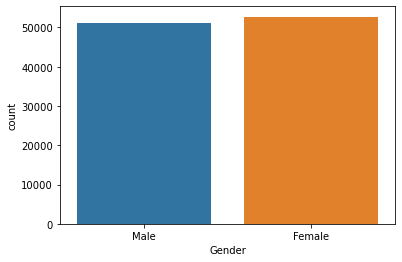

In [6]:
sns.countplot(x = 'Gender', data = train)

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

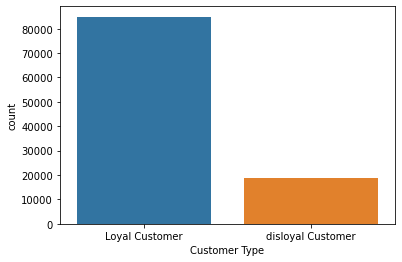

In [7]:
sns.countplot(x = 'Customer Type', data = train)

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

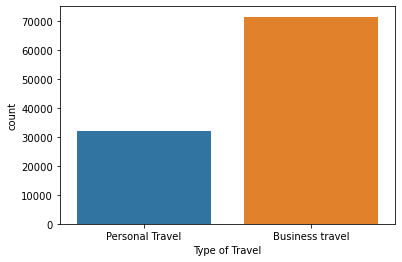

In [8]:
sns.countplot(x = 'Type of Travel', data = train)

<AxesSubplot:xlabel='Class', ylabel='count'>

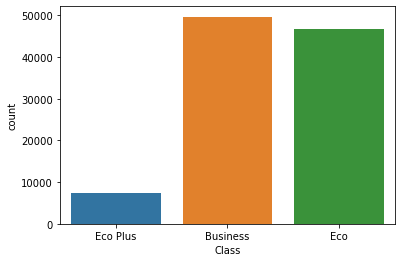

In [9]:
sns.countplot(x = 'Class', data = train)

In [10]:
train.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
#Checking Info of our data -
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

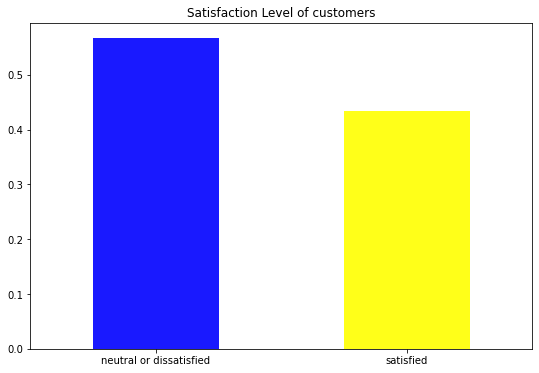

In [12]:
#Checking for Data Imbalance -
fig = plt.figure(figsize = (9,6))
train['satisfaction'].value_counts(normalize = True).plot(kind='bar', color= ['blue','yellow'], alpha = 0.9, rot=0)
plt.title('Satisfaction Level of customers')
plt.show()

In [13]:
train['satisfaction'].value_counts(normalize = True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

Hence we see that we have  56.67% of 'Neutral or Dissatisfied' customers as compared to 43.33% of 'Satisfied' customers and thus our data is almost balanced.

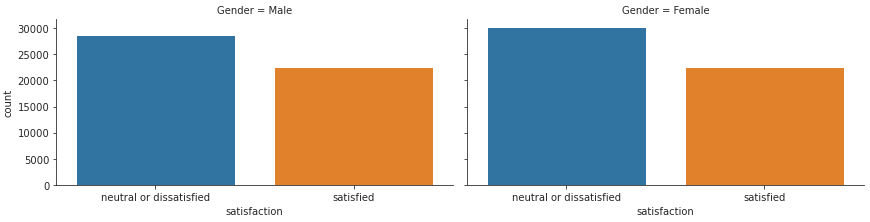

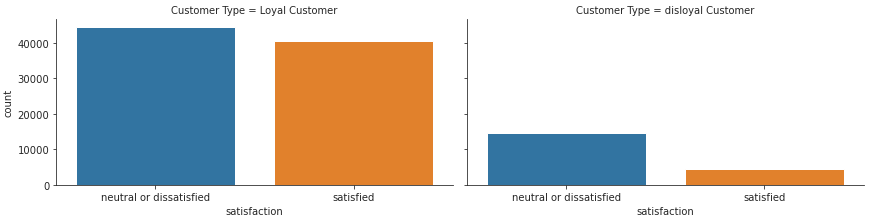

In [14]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=3, aspect=2.0)  
    g = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=train, kind="count", height=3, aspect=2.0)

For both Males and Females, we see that no. of of 'Neutral or Dissatisfied' customers are more as compared to 'Satisfied' customers. The same logic applies to 'Loyal' and 'DisLoyal' Customers. Also we see that the no . of Loyal customers are way more than 'Disloyal' customers.

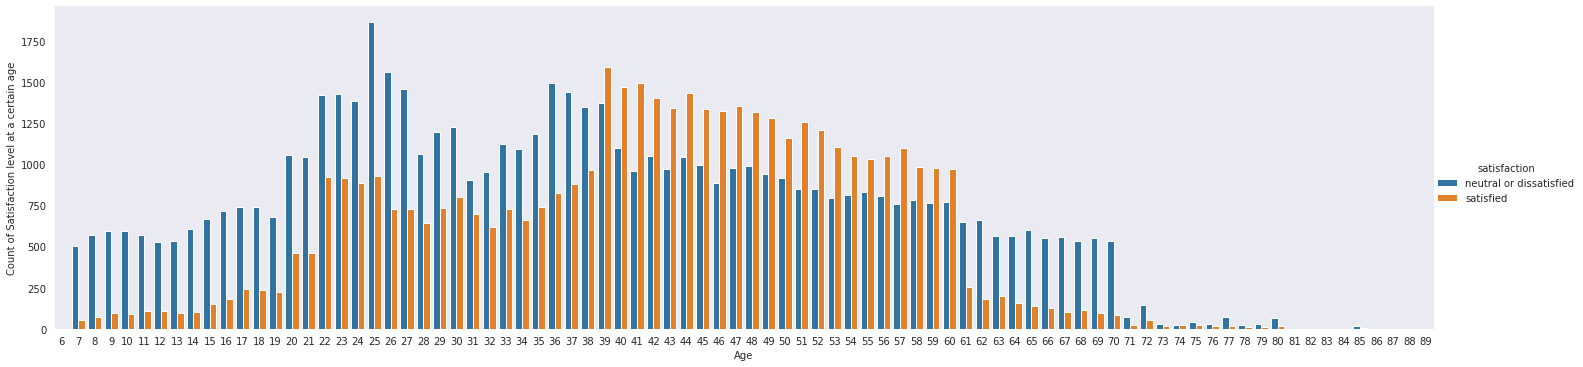

In [15]:
with sns.axes_style('dark'):
    g = sns.catplot("Age", data=train, aspect=4.0, kind='count', hue='satisfaction', order=range(6, 90))
    g.set_ylabels('Count of Satisfaction level at a certain age')

We see that our early age passengers i.e. 8-38 are more nuetral or dissatisfied as comapred to satisfied. Passengers aged 39-60 have higher satisfaction level and then the trend for dissatisfied or neutral is again higher for the remaining higher age group. 

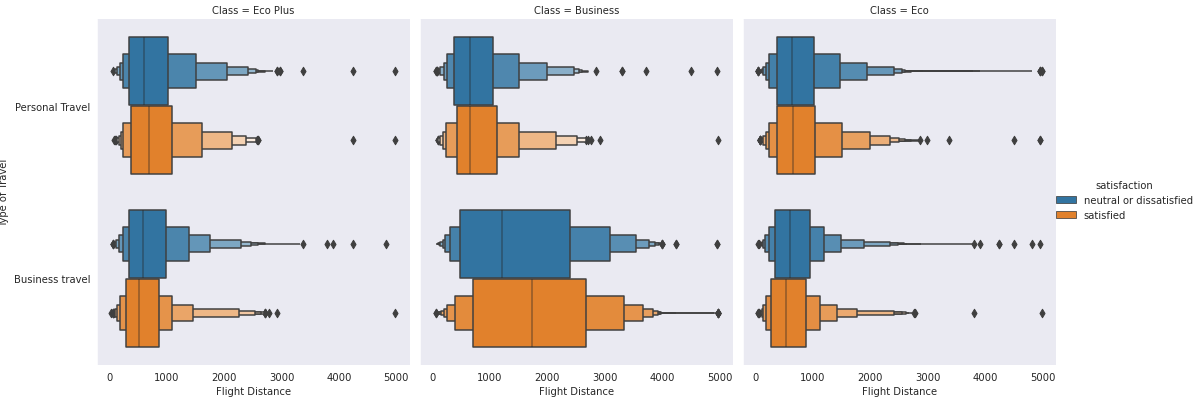

In [16]:
with sns.axes_style('dark'):
    g = sns.catplot(x="Flight Distance", y="Type of Travel",
                    hue="satisfaction", col="Class", data=train, kind="boxen", height=5.5, aspect=.9)

For business travel in business class category, th## For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers.e number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.

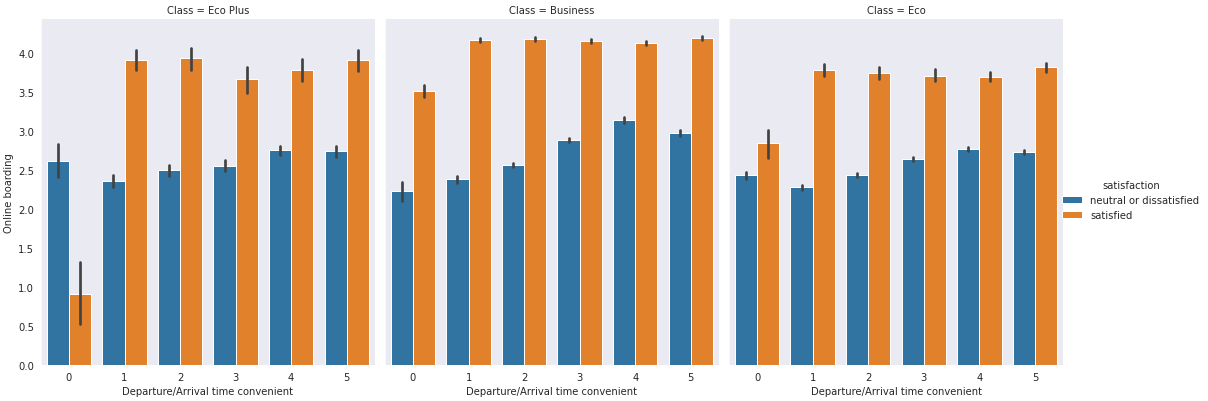

In [17]:
with sns.axes_style('dark'):
    g = sns.catplot(x="Departure/Arrival time convenient", 
                    y="Online boarding", hue="satisfaction", col="Class", 
                    data=train, kind="bar", height=5.5, aspect=.9)

For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers.

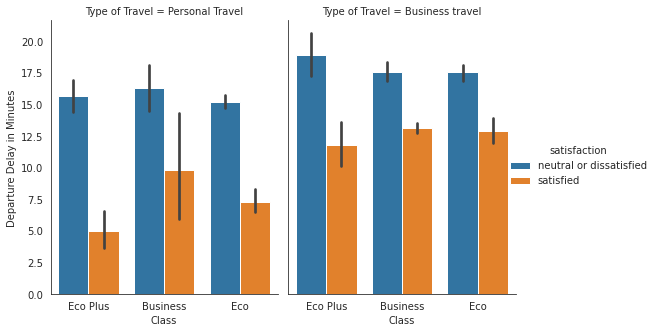

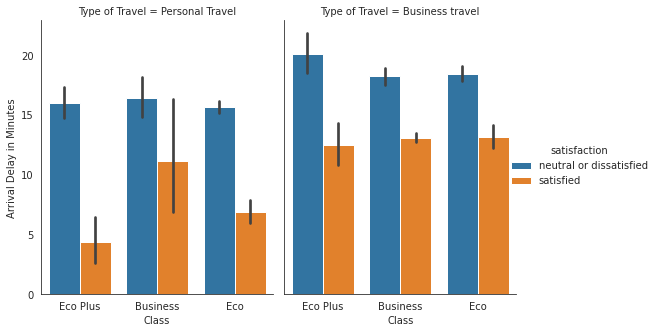

In [18]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=train, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=train, kind="bar", height=4.5, aspect=.8)

For personal travel (specially Eco Plus and Eco), the no. of dissatisfied passengers are really high when arrival delay in minutes is high. As observed the level of dissatisfied or neutral passengers is always more than the satisfied passengers whenever there's a delay in arrival or departure time. 

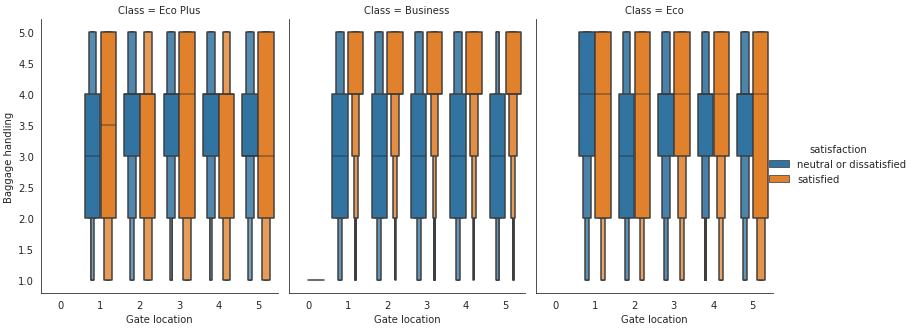

In [19]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate location", y="Baggage handling", hue="satisfaction",
                    col="Class", data=train, kind="boxen", height=4.5, aspect=.8)

For business class, it is observed that all gate locations have higher no. of dissatisfied passengers when baggage handling is not done perfectly well (rating <= 4). For Eco Plus, when the gate location is 1 and for Eco, when the gate location is 2, even when the baggages are handled in a mediocre way (rating in range 2.0 - 4.0), passengers remained dissatisfied.

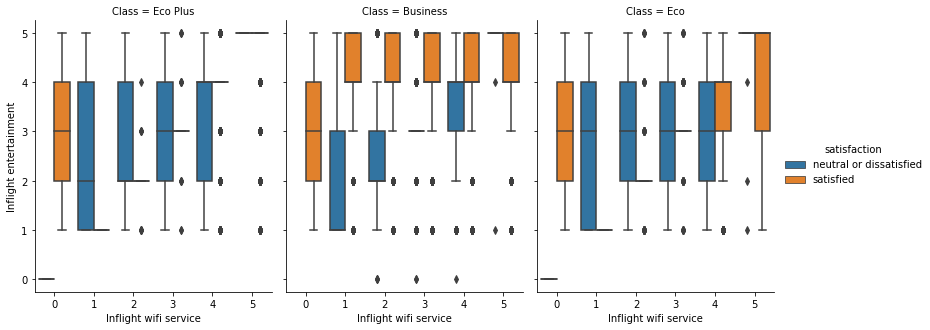

In [20]:
g = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", 
                hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

The Eco Plus passengers are mostly satisfied without in-flight wi-fi service (rating 0) and medium level of in-flight entertainment (rating 2 - 4). For Business class passengers, only highest level of in-flight entertainment (rating 5) can make them satisfied. For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

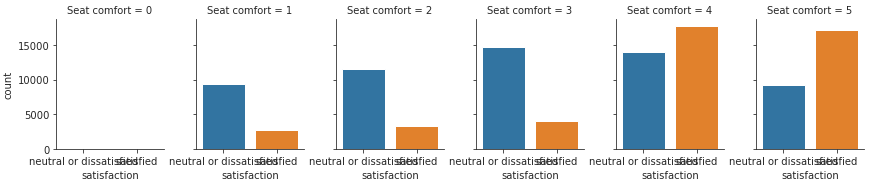

In [21]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat comfort", 
                    col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

But naturally as seat comfort increases, the customer satisfaction increases as well.

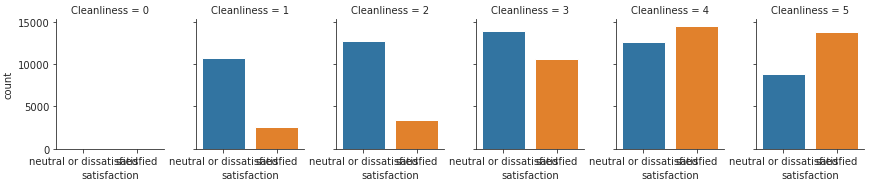

In [22]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

As cleanliness increases, the satisfaction level of passengers increases.

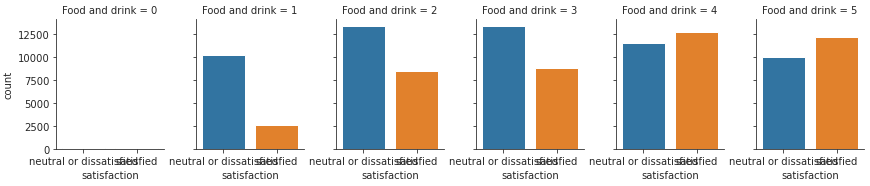

In [24]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food and drink", col_wrap=6, 
                    data=train, kind="count", height=2.5, aspect=.8)

The maximum no. of satisfied passengers belong to the category of 4 and 5 rating givers. 
Below rating 4, passengers are mostly dissatisfied.

<AxesSubplot:>

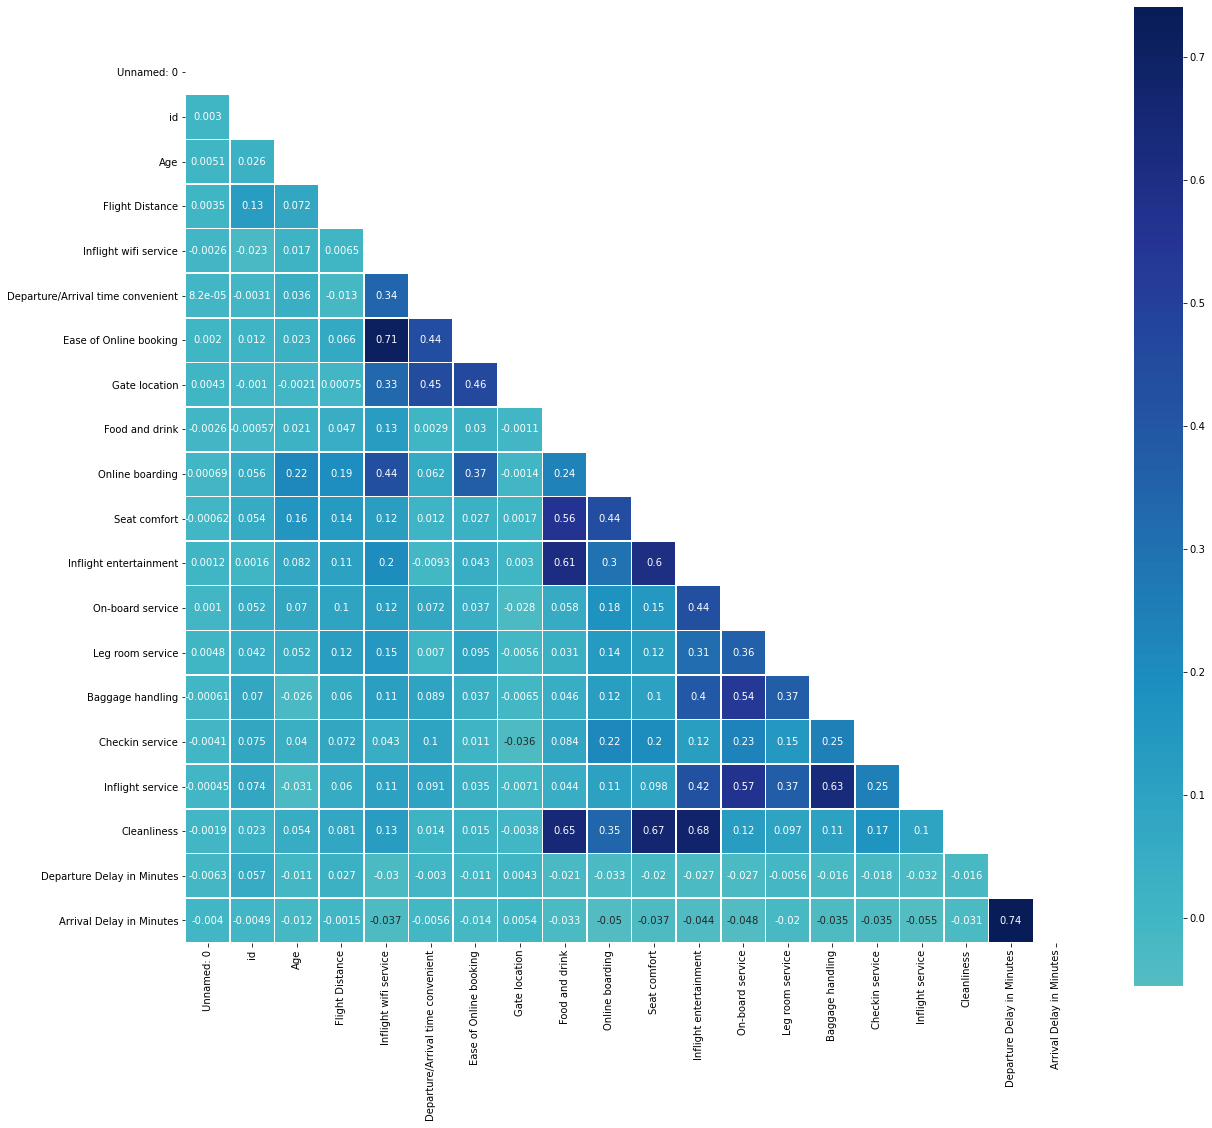

In [26]:
corr = train.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

In [27]:
col_list = train.columns

In [28]:
col_list

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Cleaning and Transforming the Data

### Checking for missing values in the dataset 

In [29]:
train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [30]:
test.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [31]:
def impute(temp):
    imputer = KNNImputer(n_neighbors=2,metric='nan_euclidean')
    #Fit the dataset
    imputer.fit(temp[['Arrival Delay in Minutes']])

    # transform the dataset
    Y = imputer.transform(temp[['Arrival Delay in Minutes']]) 

    arrival_delay_imputer = pd.DataFrame(Y,columns=['Arrival Delay in Minutes']) 
    temp['Arrival Delay in Minutes']= arrival_delay_imputer['Arrival Delay in Minutes'].reset_index(drop=True) 

In [32]:
impute(train)
impute(test)

In [33]:
test.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [34]:
train.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [35]:
#Dropping the first two columns
train = train.drop(['Unnamed: 0','id'], axis = 1)
test = test.drop(['Unnamed: 0','id'], axis = 1)

In [36]:
#Function to Transform the response variable 

def response(temp):
    if temp == "satisfied":
        return 1
    elif temp == 'neutral or dissatisfied':
        return 0

In [37]:
#Function to transform 'Gender' feature 

def gender(temp):
    if temp == "Male":
        return 0 
    elif temp == "Female":
        return 1 
    else:
        return -1 

In [38]:
#Function to transform 'Customer Type' feature 

def cust_type(temp):
    if temp == "Loyal Customer":
        return 1
    elif temp == "disloyal Customer":
        return 0
    else:
        return -1

In [39]:
#Function to transform 'Type of Travel' feature 

def type_travel(temp):
    if temp == "Business travel":
        return 1
    elif temp == "Personal Travel":
        return 0
    else:
        return -1 

In [40]:
#Function to transform 'Class' feature 

def class_type(temp):
    if temp == "Eco Plus":
        return 2
    elif temp == "Business":
        return 1
    elif temp == "Eco":
        return 0 
    else:
        return -1

In [41]:
#Function to perform the transformations on the dataset 

def transform_features(df_temp):
    df_temp['satisfaction'] = df_temp['satisfaction'].apply(response)
    df_temp['Gender'] = df_temp['Gender'].apply(gender)
    df_temp['Customer Type'] = df_temp['Customer Type'].apply(cust_type)
    df_temp['Type of Travel'] = df_temp['Type of Travel'].apply(type_travel)
    df_temp['Class'] = df_temp['Class'].apply(class_type)
    #df_temp = outlier(df_temp)

    return df_temp

In [42]:
train = transform_features(train)
test = transform_features(test)

In [43]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [44]:
col_list = col_list[2:]

In [45]:
col_list

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

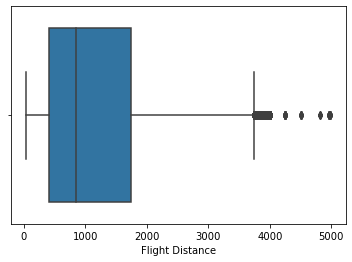

In [46]:
sns.boxplot('Flight Distance', data = train)
plt.rcParams["figure.figsize"] = (10,5)

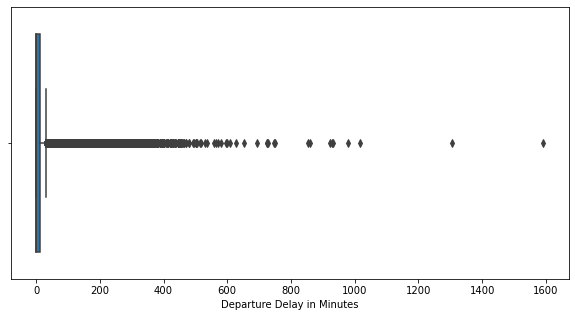

In [47]:
sns.boxplot('Departure Delay in Minutes', data = train)
plt.rcParams["figure.figsize"] = (10,5)

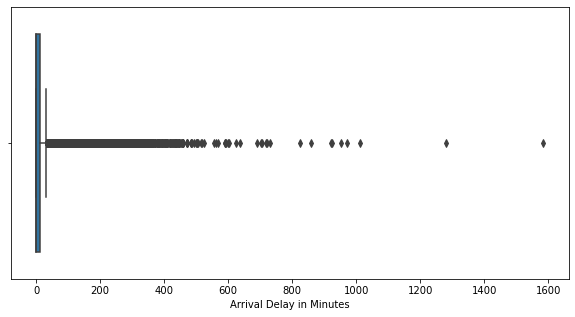

In [48]:
sns.boxplot('Arrival Delay in Minutes', data = train)
plt.rcParams["figure.figsize"] = (10,5)

In [49]:
## Scaling the data so that all the predictors are given equal importance.
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
scaled_train = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
scaled_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,1.0,0.076923,0.0,1.0,0.086632,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,0.0
1,0.0,0.0,0.230769,1.0,0.5,0.041195,0.6,0.4,0.6,0.6,...,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,0.0
2,1.0,1.0,0.243590,1.0,0.5,0.224354,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,1.0
3,1.0,1.0,0.230769,1.0,0.5,0.107229,0.4,1.0,1.0,1.0,...,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,0.0
4,0.0,1.0,0.692308,1.0,0.5,0.036955,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,1.0


In [50]:
r_scaler.fit(test)
scaled_test = pd.DataFrame(r_scaler.transform(test), columns=test.columns)
scaled_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.75,...,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462,1.0
1,1.0,1.0,0.371795,1.0,0.5,0.571890,0.2,0.2,0.6,0.00,...,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000,1.0
2,0.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.75,...,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000,0.0
3,0.0,1.0,0.474359,1.0,0.5,0.675687,0.0,0.0,0.0,0.25,...,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381,1.0
4,1.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.50,...,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937,1.0


<AxesSubplot:>

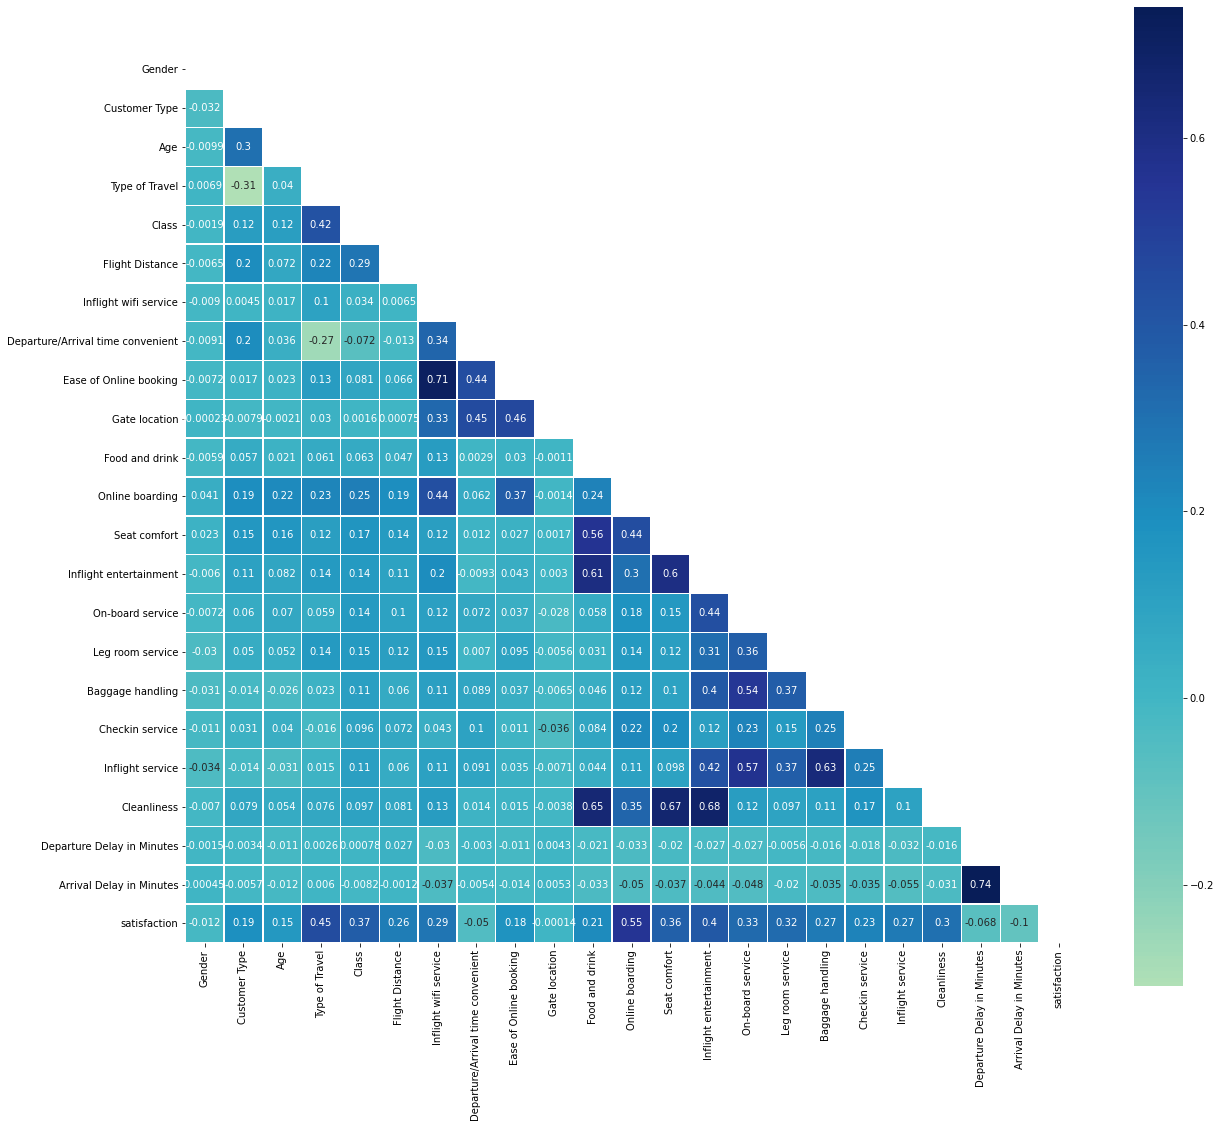

In [51]:
corr = scaled_train.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 18))
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

From the above Heatmap we can observe that the factors affecting the passengers satisfaction the most are :
1. Online Boarding 
2. Type of travel 
3. Inflight entertainment 
4. Class 
5. Seat comfort 
6. On-board service 
7. Leg room service 
8. Cleanliness 
9. Inflight wifi service 
10. Baggage Handling 

The features which affect negatively on a passengers satisfaction are :
1. Arrival Delay in minutes  
2. Departure Delay in minutes 
3. Departure/Arrival time convenient 
4. Gender 
5. Gate location 

Also from the above correlation plot we see that some of the factors are correlated with one other (multicollinearity) 
1. Arrival delay in minutes and Departure delay in minutes (0.74)
2. Ease on online booking and Inflight wifi service (0.71)
3. Cleanliness with Inflight entertainment(0.68)
4. Cleanliness with Seat comfort (0.67)
5. Cleanliness with Food and drink (0.65) 
6. Inflight service and baggage handling (0.63) 
7. Inflight entertainment with Food and drink (0.61) 

In [52]:
## Chi Square Test for feature selection
X = scaled_train.loc[:,scaled_train.columns!='satisfaction']
y = scaled_train[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
train_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Cleanliness'],
      dtype='object')


In [53]:
##Permutation test -
perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.1498 ± 0.0028,Inflight wifi service
0.1449 ± 0.0015,Type of Travel
0.0579 ± 0.0007,Customer Type
0.0458 ± 0.0003,Online boarding
0.0297 ± 0.0007,Checkin service
0.0272 ± 0.0006,Baggage handling
0.0245 ± 0.0011,Seat comfort
0.0226 ± 0.0005,Class
0.0206 ± 0.0003,Inflight service
0.0194 ± 0.0006,Cleanliness


Results of Permutation Test: 

In [54]:
features = ['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Cleanliness']

In [55]:
X_train = scaled_train[features]
y_train = scaled_train['satisfaction']
X_test = scaled_test[features]
y_test = scaled_test['satisfaction']

In [56]:
X_train.head()

,Type of Travel,Class,Flight Distance,Inflight wifi service,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Cleanliness
0,0.0,1.0,0.086632,0.6,0.6,1.0,1.0,0.8,0.6,1.0
1,1.0,0.5,0.041195,0.6,0.6,0.2,0.2,0.2,1.0,0.2
2,1.0,0.5,0.224354,0.4,1.0,1.0,1.0,0.8,0.6,1.0
3,1.0,0.5,0.107229,0.4,0.4,0.4,0.4,0.4,1.0,0.4
4,1.0,0.5,0.036955,0.6,1.0,1.0,0.6,0.6,0.8,0.6


In [57]:
X_test.head()

,Type of Travel,Class,Flight Distance,Inflight wifi service,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Cleanliness
0,1.0,0.0,0.026050,1.0,0.8,0.50,1.0,1.0,1.0,1.0
1,1.0,0.5,0.571890,0.2,0.8,1.00,0.8,0.8,0.8,1.0
2,1.0,0.0,0.032512,0.4,0.4,0.25,0.4,0.8,0.2,0.4
3,1.0,0.5,0.675687,0.0,0.8,0.75,0.2,0.2,0.2,0.8
4,1.0,0.0,0.232431,0.4,0.2,0.25,0.4,0.4,0.4,0.8


In [58]:
len(X_train)

103904

In [59]:
len(y_train)

103904

## Classification Models

### Logistic Regression 

Logistic regression builds a regression model to predict the probability that a particular data entry belongs to a particular class (1). It models the data using sigmoid function. 

##### Assumptions:
1. Target variable is binary and level 1 should define the desired outcome. 
2. Large sample size
3. Only important features must be considered. 
4. The model should have no or little multicollinearity. 

GridSearchCV tries all possibilities of hyperparameters. Hence the main drawback of this method is that it is computationally expensive. 

Our main aim is to minimize error to get the best predicted output. 
We try and minimize the cost function (quadratic function).

1. Newton's method : It uses a better quadratic function minimization. (using 1st and 2nd partial derivatives) using hessian matrix. At each iteration is approximates f(x) a quadratic functin and takes a step towards max/min of that function. <br>
Drawbacks:computationally expensive because of hessian matrix, It attracts to saddle points. 
<br>
2. Limited-memory Broyden-Fletcher-Goldfarb-Shanno (lbfgs):
It approximates hessian matrix using updates specified by gradient evaluations. (saves a few vectors that represent the approximation implicity). It is now the default in sklearn library for logistic. 
Drawbacks: It sometimes may not converge to anything 
<br>
3. A libray for Large Linear Classification: 
Uses coordinate Descent (CD) algorithm solving optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes. It applies L1 regularilzation 
<br>
4. SAGA:
A variant of sag(Stochastic Average gradient descent). It supports L1 penalty and is therefore suitable for large datasets. 
sag optimizes the sum of a finite number of smooth convex functions. It is faster than other solvers for large datasets as it incorporates memory of previous gradient values. 


The most commonly used penalized regression include:

1. Ridge regression: variables with minor contribution have their coefficients close to zero. However, all the variables are incorporated in the model. This is useful when all variables need to be incorporated in the model according to domain knowledge.<br>
2. Lasso regression: the coefficients of some less contributive variables are forced to be exactly zero. Only the most significant variables are kept in the final model.<br>
3. Elastic net regression: the combination of ridge and lasso regression. It shrinks some coefficients toward zero (like ridge regression) and set some coefficients to exactly zero (like lasso regression)

In [60]:
logistic_model = LogisticRegression()
solvers = ['newton-cg','lbfgs', 'liblinear', 'saga']
penalty = ['l1','l2','elasticnet']
c_val = [100,10,1,0.1,0.01]
log_grid = dict(solver = solvers, penalty = penalty, C = c_val)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 123)
grid_search = GridSearchCV(estimator = logistic_model, param_grid = log_grid, n_jobs = -1,
                           cv = cv, scoring = 'accuracy', error_score = 0)
grid_results = grid_search.fit(X_train, y_train)

In [61]:
print("Best accuracy : %f using parameters %s"%(grid_results.best_score_,grid_results.best_params_))

Best accuracy : 0.853037 using parameters {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


In [62]:
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.852861 (0.002944) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.852871 (0.002948) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.852867 (0.002939) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.852874 (0.002934) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.852871 (0.002942) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.852861 (0.002947) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-

In [63]:
log_pred = grid_search.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, log_pred)
print("The accuracy of Logistic regression model is : {}".format(accuracy))

The accuracy of Logistic regression model is : 0.8517092700954727


ROC Area under the curve for Logistic model : 0.8471973667857374


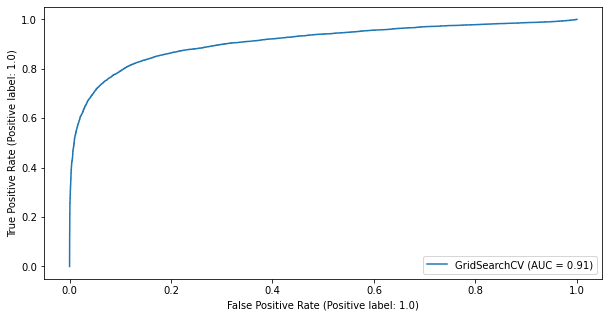

In [65]:
#AUC 
roc = roc_auc_score(y_test, log_pred)
print("ROC Area under the curve for Logistic model : {}".format(roc))
plot_roc_curve(grid_search, X_test, y_test)

In [66]:
print(classification_report(y_test, log_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.8562    0.8842    0.8700     14573
         1.0     0.8455    0.8102    0.8275     11403

    accuracy                         0.8517     25976
   macro avg     0.8509    0.8472    0.8487     25976
weighted avg     0.8515    0.8517    0.8513     25976



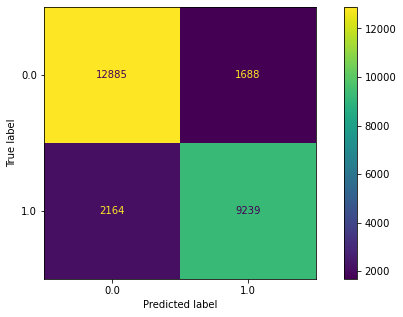

In [67]:
plot_confusion_matrix(grid_search, X_test, y_test)

### Decision Trees 

In [68]:
decision = DecisionTreeClassifier()

In [69]:
decision_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [70]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 2, random_state=1)
grid_decision = GridSearchCV(estimator=decision, param_grid = decision_params, cv = cv,
                             n_jobs=-1,scoring = "accuracy")
decision_fit = grid_decision.fit(X_train, y_train)

In [71]:
print("Best accuracy : %f using parameters %s"%(decision_fit.best_score_,decision_fit.best_params_))

Best accuracy : 0.935224 using parameters {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 50}


In [72]:
means = decision_fit.cv_results_['mean_test_score']
stds = decision_fit.cv_results_['std_test_score']
params = decision_fit.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.859187 (0.003466) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}
0.859187 (0.003466) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}
0.859187 (0.003466) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 20}
0.859187 (0.003466) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 50}
0.859187 (0.003466) with: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100}
0.884971 (0.002649) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
0.884899 (0.002634) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}
0.884899 (0.002634) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}
0.884899 (0.002634) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}
0.884899 (0.002634) with: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}
0.901250 (0.003035) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
0.901173 (0.003035) with: {'crite

In [73]:
decision_pred = decision_fit.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, decision_pred)
print("The accuracy of decison tree model is : {}".format(accuracy))

The accuracy of decison tree model is : 0.9361333538651062


ROC Area under the curve for decision tree model : 0.9337800352408463


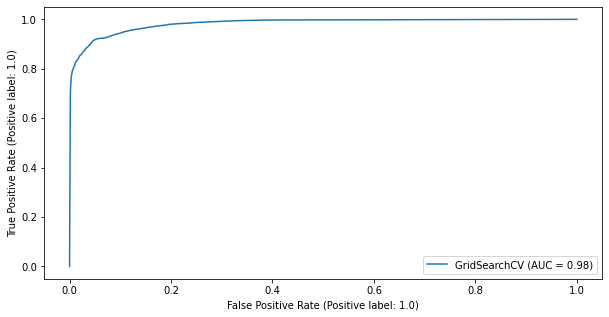

In [75]:
#AUC 
roc = roc_auc_score(y_test, decision_pred)
print("ROC Area under the curve for decision tree model : {}".format(roc))
plot_roc_curve(decision_fit, X_test, y_test)

In [76]:
print(classification_report(y_test, decision_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9344    0.9531    0.9436     14573
         1.0     0.9384    0.9145    0.9263     11403

    accuracy                         0.9361     25976
   macro avg     0.9364    0.9338    0.9350     25976
weighted avg     0.9362    0.9361    0.9360     25976



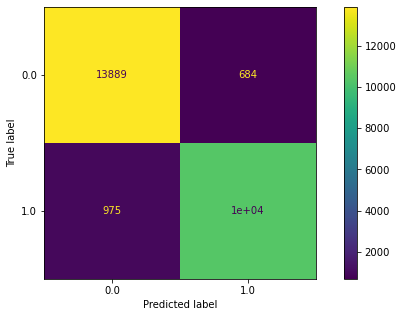

In [77]:
plot_confusion_matrix(decision_fit, X_test, y_test)

In [113]:
row_to_show = 10
data_for_prediction = X_train.iloc[row_to_show]  
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
grid_decision.predict_proba(data_for_prediction_array)

array([[0.58333333, 0.41666667]])

In [119]:
model = grid_decision.best_estimator_
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [125]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

#### Graphical visualization of the decision tree

In [ ]:
Inflight wifi service
0.1449 ± 0.0015	Type of Travel
0.0579 ± 0.0007	Customer Type
0.0458 ± 0.0003	Online boarding
0.0297 ± 0.0007	Checkin service
0.0272 ± 0.0006	Baggage handling

In [ ]:
'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Cleanliness'],
      dtype='object'

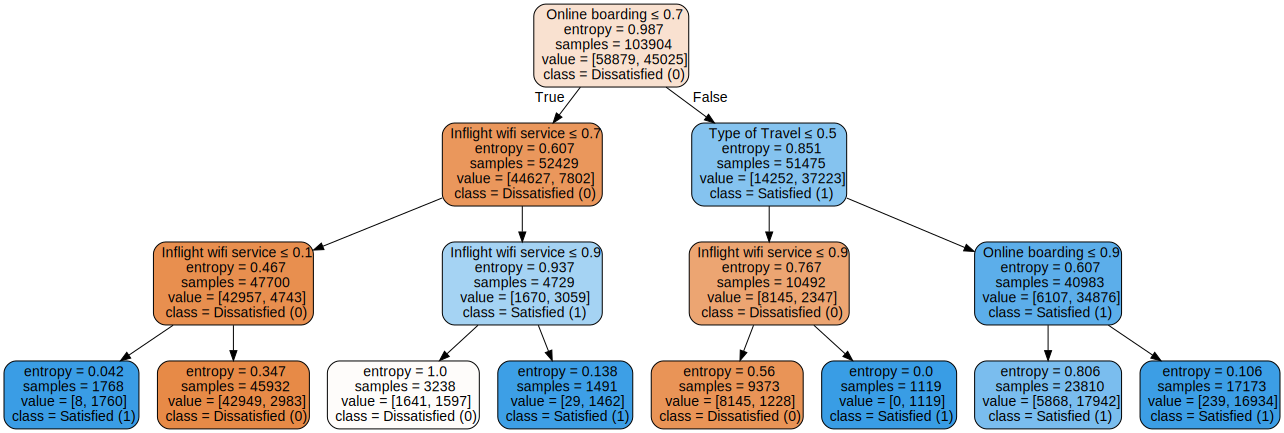

In [104]:

features_n = ['Inflight wifi service','Type of Travel','Seat comfort','Online boarding', 'Checkin service']
X_train_temp = scaled_train[features_n]
data = export_graphviz(DecisionTreeClassifier(max_depth=3, criterion = 'entropy').fit(X_train_temp, y_train), out_file=None, 
                       feature_names = features_n,
                       class_names = ['Dissatisfied (0)', 'Satisfied (1)'], 
                       filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(data)
graph

### Random Forests 

In [ ]:
def random_Forest_Optimization(X, y):
    # define models and parameters
    rf_model = RandomForestClassifier()
    estimator_values = [10, 100, 1000]
    max_feature_grid = ['sqrt', 'log2']

    # define grid search
    grid = dict(n_estimators=estimator_values,max_features=max_feature_grid)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_grid = GridSearchCV(estimator=rf_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    rf_fit = cv_grid.fit(X, y)

    # summarize results
    print("Best: %f using %s" % (rf_fit.best_score_, rf_fit.best_params_))
    rf_mean = rf_fit.cv_results_['mean_test_score']
    rf_stds = rf_fit.cv_results_['std_test_score']
    rf_params = rf_fit.cv_results_['params']
    for mean, stdev, param in zip(rf_mean, rf_stds, rf_params):
      print("%f (%f) with: %r" % (mean, stdev, param))
    
    return cv_grid 

In [ ]:
randmod = random_Forest_Optimization(X_train, y_train)

In [ ]:
random_pred = randmod.predict(X_test)
accuracy = accuracy_score(y_test, random_pred)
print("The accuracy of random forests model is : {}".format(accuracy))

In [ ]:
#AUC 
roc = roc_auc_score(y_test, random_pred)
print("ROC Area under the curve for random forest: {}".format(roc))
plot_roc_curve(randmod, X_test, y_test)

In [ ]:
print(classification_report(y_test, random_pred, digits=4))

In [ ]:
plot_confusion_matrix(randmod, X_test, y_test)

### K-Nearest Neighbours 

In [78]:
def knn_Optimization(X,y):
    knn_model = KNeighborsClassifier()
    neighbors_grid = range(1,10, 1)
    weight_grid = ['uniform', 'distance']
    metric_grid = ['euclidean', 'manhattan', 'minkowski']

    # define grid search
    knn_grid = dict(n_neighbors=neighbors_grid,weights=weight_grid,metric=metric_grid)
    knn_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 2 , random_state=1)
    knn_fit = GridSearchCV(estimator=knn_model, param_grid=knn_grid, n_jobs=-1, cv=knn_cv, scoring='accuracy',error_score=0)
    knn_res = knn_fit.fit(X, y)

    # summarize results
    print("Best: %f using %s" % (knn_res.best_score_, knn_res.best_params_))
    mean_value = knn_res.cv_results_['mean_test_score']
    std_value = knn_res.cv_results_['std_test_score']
    parameters = knn_res.cv_results_['params']
    for mean, stdev, param in zip(mean_value, std_value, parameters):
      print("%f (%f) with: %r" % (mean, stdev, param))
    
    return knn_fit

In [79]:
knnmod = knn_Optimization(X_train,y_train)

Best: 0.931374 using {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
0.917015 (0.001712) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.917015 (0.001712) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.918309 (0.002532) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.917039 (0.001756) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.925941 (0.002069) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.921230 (0.002038) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.924753 (0.001888) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.922837 (0.001975) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.928771 (0.001975) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.923530 (0.002188) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.926716 (

In [87]:
knn_pred = knnmod.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, knn_pred)
print("The accuracy of K-Nearest neighbors model is : {}".format(accuracy))

The accuracy of K-Nearest neighbors model is : 0.9321296581459809


ROC Area under the curve for K-Nearest neighbours : 0.9287906179715485


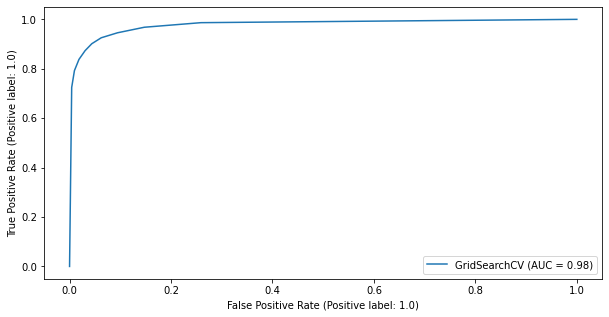

In [83]:
#AUC 
roc = roc_auc_score(y_test, knn_pred)
print("ROC Area under the curve for K-Nearest neighbours : {}".format(roc))
plot_roc_curve(knnmod, X_test, y_test)

In [84]:
print(classification_report(y_test, knn_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9254    0.9562    0.9405     14573
         1.0     0.9415    0.9014    0.9210     11403

    accuracy                         0.9321     25976
   macro avg     0.9334    0.9288    0.9308     25976
weighted avg     0.9324    0.9321    0.9319     25976



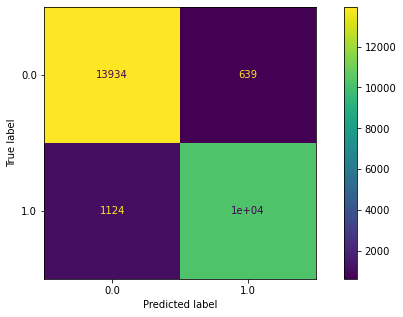

In [85]:
plot_confusion_matrix(knnmod, X_test, y_test)

## SVM 

In [ ]:
svm_model = SVC()

kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

grid_svm = dict(kernel=kernel,C=C,gamma=gamma)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
svm_search = GridSearchCV(estimator=svm_model, param_grid=grid_svm, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = svm_search.fit(X, y)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
svm_pred = svm_search.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, svm_pred)
print("The testing accuracy of SVM model is : {}".format(accuracy))

In [ ]:
#AUC 
roc = roc_auc_score(y_test, svm_pred)
print("ROC Area under the curve for SVM : {}".format(roc))
plot_roc_curve(svm_search, X_test, y_test)

In [ ]:
print(classification_report(y_test, svm_pred, digits=4))

In [ ]:
plot_confusion_matrix(svm_search, X_test, y_test)

### Ada Boost 

In [ ]:
def AdaBoost_optimizer(X,y):
  # define the model with default hyperparameters
  ada_model = AdaBoostClassifier()

  # define the grid of values to search
  grid_ada = dict()
  grid_ada['n_estimators'] = [10, 50, 100, 500]
  grid_ada['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

  # define the evaluation procedure
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

  # define the grid search procedure
  ada_fit = GridSearchCV(estimator=ada_model, param_grid=grid_ada, n_jobs=-1, cv=cv, scoring='accuracy')

  # execute the grid search
  grid_result = ada_fit.fit(X, y)

  # summarize the best score and configuration
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

  # summarize all scores that were evaluated
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

  return ada_fit
  
  

In [ ]:
adamod = AdaBoost_optimizer(X_train,y_train)

In [ ]:
ada_pred = adamod.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, ada_pred)
print("The testing accuracy of Ada Boost model is : {}".format(accuracy))

In [ ]:
#AUC 
roc = roc_auc_score(y_test, svm_pred)
print("ROC Area under the curve for Ada Boost : {}".format(roc))
plot_roc_curve(adamod, X_test, y_test)

In [ ]:
print(classification_report(y_test, ada_pred, digits=4))

In [ ]:
plot_confusion_matrix(adamod, X_test, y_test)

### XGBoost

In [ ]:
#setting default resolution of figures
mpl.rcParams['figure.dpi'] = 200

#creating deepcopy of default parameters before manipulations
params = deepcopy(default_params)

#setting grid of selected parameters for iteration
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
              
#start time
t0 = time.time()
#No. of jobs
gcvj = np.cumsum([len(x) for x in param_grid.values()])[-1]

#iteration loop. Each selected parameter iterated separately
for i,grid_key in enumerate(param_grid.keys()):
    
    #variable for measuring iteration time
    loop_start = time.time()
       
    #creating param_grid argument for GridSearchCV:
    #listing grid values of current iterable parameter and wrapping non-iterable parameter single values in list
    for param_key in params.keys():
        if param_key == grid_key:
            params[param_key] = param_grid[grid_key]
        else:
            #use best parameters of last iteration
            try:
                param_value = [clf.best_params_[param_key]]
                params[param_key] = param_value
            #use benchmark model parameters for first iteration
            except:
                param_value = [clf0.best_params_[param_key]]
                params[param_key] = param_value
    
    #classifier instance of current iteration
    xgbc = xgb.XGBClassifier(**default_params)
    
    #GridSearch instance of current iteration
    clf = GridSearchCV(estimator=xgbc, param_grid=params, scoring='accuracy', return_train_score=True, verbose=1, cv=3)
    clf.fit(X_train, y_train.values.ravel())
    
    #results dataframe
    df = pd.DataFrame(clf.cv_results_)
    
    #predictions - inputs to confusion matrix
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
      
    #confusion matrices
    cfm_train = confusion_matrix(y_train, train_predictions)
    cfm_test = confusion_matrix(y_test, test_predictions)

    
    #accuracy scores
    accs_train = accuracy_score(y_train, train_predictions)
    accs_test = accuracy_score(y_test, test_predictions)

    
    #F1 scores for each train/test label
    f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
    f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
    f1s_test_p1 = f1_score(y_test, test_predictions, pos_label=1)
    f1s_test_p0 = f1_score(y_test, test_predictions, pos_label=0)

    
    #Area Under the Receiver Operating Characteristic Curve
    test_ras = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

    
    #best parameters
    bp = clf.best_params_
    
    #storing computed values in results dictionary
    results_dict[f'xgbc{i+1}'] = {'iterable_parameter': grid_key,
                                  'classifier': deepcopy(clf),
                                  'cv_results': df.copy(),
                                  'cfm_train': cfm_train,
                                  'cfm_test': cfm_test,
                                  'train_accuracy': accs_train,
                                  'test_accuracy': accs_test,
                                  'train F1-score label 1': f1s_train_p1,
                                  'train F1-score label 0': f1s_train_p0,
                                  'test F1-score label 1': f1s_test_p1,
                                  'test F1-score label 0': f1s_test_p0,
                                  'test roc auc score': test_ras,
                                  'best_params': bp}
    
    #variable for measuring iteration time
    elapsed_time = time.time() - loop_start
    print(f'iteration #{i+1} finished in: {elapsed_time} seconds')

#stop time
t1 = time.time()

#elapsed time
gcvt = t1 - t0

results_dict